<a href="https://colab.research.google.com/github/PacktPublishing/Hands-On-Computer-Vision-with-PyTorch/blob/master/Chapter01/Learning_rate.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
x = [[1],[2],[3],[4]]
y = [[3],[6],[9],[12]]

In [2]:
from copy import deepcopy
import numpy as np
def feed_forward(inputs, outputs, weights):
    out = np.dot(inputs,weights[0])+ weights[1]
    mean_squared_error = np.mean(np.square(out - outputs))
    return mean_squared_error

C:\Users\Jorrit\Miniconda3\lib\site-packages\numpy\_distributor_init.py:32: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\Jorrit\Miniconda3\lib\site-packages\numpy\.libs\libopenblas.TXA6YQSD3GCQQC22GEQ54J2UDCXDXHWN.gfortran-win_amd64.dll
C:\Users\Jorrit\Miniconda3\lib\site-packages\numpy\.libs\libopenblas.WCDJNK7YVMPZQ2ME2ZZHJJRJ3JIKNDB7.gfortran-win_amd64.dll
  stacklevel=1)


In [3]:
def update_weights(inputs, outputs, weights, lr):
    original_weights = deepcopy(weights)
    org_loss = feed_forward(inputs, outputs, original_weights)
    updated_weights = deepcopy(weights)
    for i, layer in enumerate(original_weights):
        for index, weight in np.ndenumerate(layer):
            temp_weights = deepcopy(weights)
            temp_weights[i][index] += 0.0001
            _loss_plus = feed_forward(inputs, outputs, temp_weights)
            grad = (_loss_plus - org_loss)/(0.0001)
            updated_weights[i][index] -= grad*lr
    return updated_weights

In [4]:
W = [np.array([[0]], dtype=np.float32), np.array([[0]], dtype=np.float32)]

In [5]:
weight_value = []
for epx in range(1000):
    W = update_weights(x,y,W,0.01)
    weight_value.append(W[0][0][0])


Text(0, 0.5, 'Weight value')

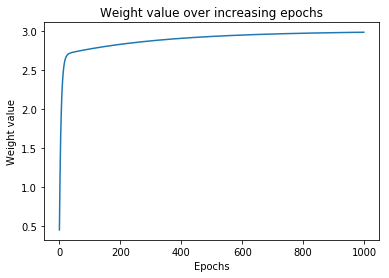

In [6]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(weight_value)
plt.title('Weight value over increasing epochs')
plt.xlabel('Epochs')
plt.ylabel('Weight value')

Text(0, 0.5, 'Weight value')

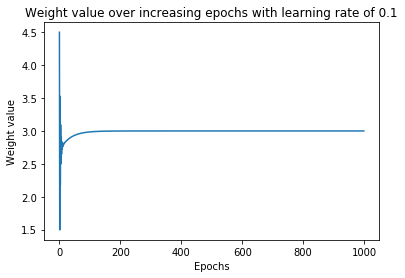

In [7]:
W = [np.array([[0]], dtype=np.float32), np.array([[0]], dtype=np.float32)]
weight_value = []
for epx in range(1000):
    W = update_weights(x,y,W,0.1)
    weight_value.append(W[0][0][0])
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(weight_value)
plt.title('Weight value over increasing epochs with learning rate of 0.1')
plt.xlabel('Epochs')
plt.ylabel('Weight value')

Text(0, 0.5, 'Weight value')

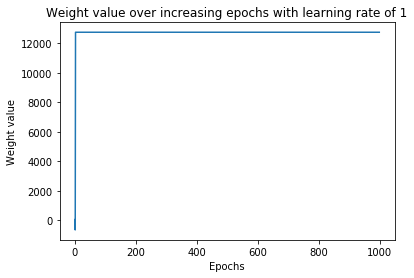

In [8]:
W = [np.array([[0]], dtype=np.float32), np.array([[0]], dtype=np.float32)]
weight_value = []
for epx in range(1000):
    W = update_weights(x,y,W,1)
    weight_value.append(W[0][0][0])
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(weight_value)
plt.title('Weight value over increasing epochs with learning rate of 1')
plt.xlabel('Epochs')
plt.ylabel('Weight value')

In [9]:
def update_weights(inputs, outputs, weights, lr):
    original_weights = deepcopy(weights)
    org_loss = feed_forward(inputs, outputs, original_weights)
    updated_weights = deepcopy(weights)
    for i, layer in enumerate(original_weights):
        for index, weight in np.ndenumerate(layer):
            temp_weights = deepcopy(weights)
            temp_weights[i][index] += 0.0001
            _loss_plus = feed_forward(inputs, outputs, temp_weights)
            grad = (_loss_plus - org_loss)/(0.0001)
            updated_weights[i][index] -= grad*lr
            if(i % 2 == 0):
                print('weight value:', np.round(original_weights[i][index],2), 
                      'original loss:', np.round(org_loss,2), 
                      'loss_plus:', np.round(_loss_plus,2), 
                      'gradient:', np.round(grad,2), 
                      'updated_weights:', np.round(updated_weights[i][index],2))
    return updated_weights

weight value: 0.0 original loss: 67.5 loss_plus: 67.5 gradient: -45.0 updated_weights: 0.45
weight value: 0.45 original loss: 46.88 loss_plus: 46.88 gradient: -37.49 updated_weights: 0.82
weight value: 0.82 original loss: 32.57 loss_plus: 32.57 gradient: -31.26 updated_weights: 1.14
weight value: 1.14 original loss: 22.64 loss_plus: 22.64 gradient: -26.05 updated_weights: 1.4
weight value: 1.4 original loss: 15.75 loss_plus: 15.75 gradient: -21.72 updated_weights: 1.62
weight value: 1.62 original loss: 10.97 loss_plus: 10.97 gradient: -18.1 updated_weights: 1.8
weight value: 1.8 original loss: 7.65 loss_plus: 7.65 gradient: -15.09 updated_weights: 1.95
weight value: 1.95 original loss: 5.35 loss_plus: 5.35 gradient: -12.59 updated_weights: 2.07
weight value: 2.07 original loss: 3.75 loss_plus: 3.75 gradient: -10.49 updated_weights: 2.18
weight value: 2.18 original loss: 2.64 loss_plus: 2.64 gradient: -8.75 updated_weights: 2.27
[array([[2.265477]], dtype=float32), array([[0.7404298]], 

Text(0, 0.5, 'Weight value')

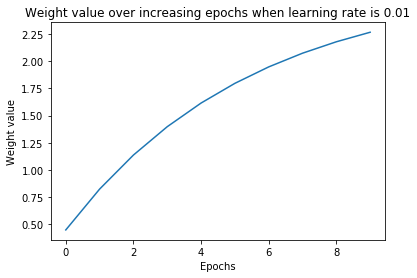

In [10]:
W = [np.array([[0]], dtype=np.float32), np.array([[0]], dtype=np.float32)]
weight_value = []
for epx in range(10):
    W = update_weights(x,y,W,0.01)
    weight_value.append(W[0][0][0])
print(W)
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(weight_value[:100])
plt.title('Weight value over increasing epochs when learning rate is 0.01')
plt.xlabel('Epochs')
plt.ylabel('Weight value')

weight value: 0.0 original loss: 67.5 loss_plus: 67.5 gradient: -45.0 updated_weights: 4.5
weight value: 4.5 original loss: 30.37 loss_plus: 30.38 gradient: 30.04 updated_weights: 1.5
weight value: 1.5 original loss: 13.79 loss_plus: 13.78 gradient: -20.31 updated_weights: 3.53
weight value: 3.53 original loss: 6.25 loss_plus: 6.26 gradient: 13.46 updated_weights: 2.18
weight value: 2.18 original loss: 2.85 loss_plus: 2.85 gradient: -9.14 updated_weights: 3.1
weight value: 3.1 original loss: 1.33 loss_plus: 1.33 gradient: 5.97 updated_weights: 2.5
weight value: 2.5 original loss: 0.65 loss_plus: 0.65 gradient: -4.12 updated_weights: 2.91
weight value: 2.91 original loss: 0.34 loss_plus: 0.34 gradient: 2.63 updated_weights: 2.65
weight value: 2.65 original loss: 0.2 loss_plus: 0.2 gradient: -1.88 updated_weights: 2.84
weight value: 2.84 original loss: 0.13 loss_plus: 0.13 gradient: 1.14 updated_weights: 2.72
[array([[2.7217765]], dtype=float32), array([[0.6589097]], dtype=float32)]


Text(0, 0.5, 'Weight value')

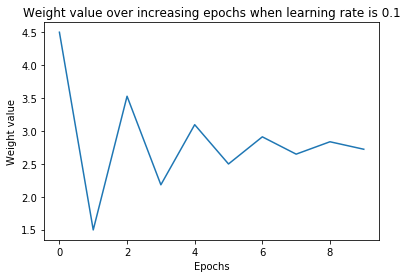

In [11]:
W = [np.array([[0]], dtype=np.float32), np.array([[0]], dtype=np.float32)]
weight_value = []
for epx in range(10):
    W = update_weights(x,y,W,0.1)
    weight_value.append(W[0][0][0])
print(W)
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(weight_value[:100])
plt.title('Weight value over increasing epochs when learning rate is 0.1')
plt.xlabel('Epochs')
plt.ylabel('Weight value')

weight value: 0.0 original loss: 67.5 loss_plus: 67.5 gradient: -45.0 updated_weights: 45.0
weight value: 45.0 original loss: 16604.45 loss_plus: 16604.52 gradient: 699.22 updated_weights: -654.22
weight value: -654.22 original loss: 4030779.1 loss_plus: 4030777.76 gradient: -13409.38 updated_weights: 12755.16
weight value: 12755.16 original loss: 1473935827.59 loss_plus: 1473935827.59 gradient: 0.0 updated_weights: 12755.16
weight value: 12755.16 original loss: 1473935827.59 loss_plus: 1473935827.59 gradient: 0.0 updated_weights: 12755.16
weight value: 12755.16 original loss: 1473935827.59 loss_plus: 1473935827.59 gradient: 0.0 updated_weights: 12755.16
weight value: 12755.16 original loss: 1473935827.59 loss_plus: 1473935827.59 gradient: 0.0 updated_weights: 12755.16
weight value: 12755.16 original loss: 1473935827.59 loss_plus: 1473935827.59 gradient: 0.0 updated_weights: 12755.16
weight value: 12755.16 original loss: 1473935827.59 loss_plus: 1473935827.59 gradient: 0.0 updated_weig

Text(0, 0.5, 'Weight value')

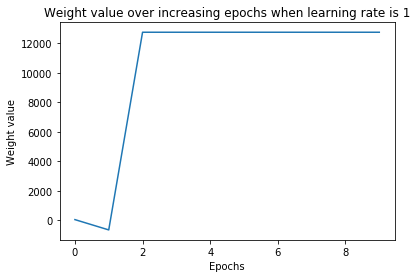

In [12]:
W = [np.array([[0]], dtype=np.float32), np.array([[0]], dtype=np.float32)]
weight_value = []
for epx in range(10):
    W = update_weights(x,y,W,1)
    weight_value.append(W[0][0][0])
print(W)
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(weight_value[:100])
plt.title('Weight value over increasing epochs when learning rate is 1')
plt.xlabel('Epochs')
plt.ylabel('Weight value')